In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [2]:
df = pd.read_csv('review2.csv')

df.head()

name                                            comment
0    ÎÇò                                      Ïù¥Í±∞ ÏßÄÌòºÏûê ÏÇ≠Ï†úÎêòÎäîÎç∞?
1    ÎÇò  ÏöîÏ¶ò ÌïúÎã¨Ïó¨Í∞Ñ ÏÉÅÎåÄÎ∞© ÌÜ°Ïù¥ Ïò§ÏßÄÎèÑ ÏïäÍ≥† ÎÇ¥Í∞Ä Î≥¥ÎÇ∏ ÌÜ°ÎèÑ ÏÉÅÎåÄÍ∞Ä ÏùΩÏóàÎäîÎç∞ ÏïàÏùΩÏóàÎäîÎç∞ ...
2    ÎÇò                   Ïôú Î°úÍ∑∏Ïù∏ Í∞ÄÏûÖ ÎëòÎã§ ÏïàÎêòÎÇòÏöî? Í≥ÑÏÜç Ïù∏Ï¶ùÎèÑ ÏïàÎêúÎã§Í≥† ÌïòÍ≥†
3    ÎÇò  ÏöîÏ¶ò Ï†ÑÏÜ° Ïã§Ìå®Í∞Ä Ïû¶ÏïÑÏöî Í∑∏Î¶¨Íµ¨ Î©îÏãúÏßÄ ÏôîÎã§Îäî ÏïåÎ¶ºÏùÄ Ïò§ÎäîÎç∞ Ïã§Ï†ú Î©îÏãúÏßÄÎ•º Î∞õÎäîÍ±¥ ...
4    ÎÇò             Î™®Î•¥Í≥† ÏßÄÏõ†ÏúºÎ©¥ ÏïÑÏù¥Îîî Ï†ÄÏû•Îê¨ÎçòÍ±∞ ÏãπÎã§ ÏßÄÏõåÏßê Ï†ïÎßê Î∂àÌé∏Ìï®... „Ö°„Ö°

In [3]:
df['name'] = df['name'].str.strip()
df['comment'] = df['comment'].str.strip()
df['name'].replace('', np.nan, inplace=True)
df['comment'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

name                                            comment
0    ÎÇò                                      Ïù¥Í±∞ ÏßÄÌòºÏûê ÏÇ≠Ï†úÎêòÎäîÎç∞?
1    ÎÇò  ÏöîÏ¶ò ÌïúÎã¨Ïó¨Í∞Ñ ÏÉÅÎåÄÎ∞© ÌÜ°Ïù¥ Ïò§ÏßÄÎèÑ ÏïäÍ≥† ÎÇ¥Í∞Ä Î≥¥ÎÇ∏ ÌÜ°ÎèÑ ÏÉÅÎåÄÍ∞Ä ÏùΩÏóàÎäîÎç∞ ÏïàÏùΩÏóàÎäîÎç∞ ...
2    ÎÇò                   Ïôú Î°úÍ∑∏Ïù∏ Í∞ÄÏûÖ ÎëòÎã§ ÏïàÎêòÎÇòÏöî? Í≥ÑÏÜç Ïù∏Ï¶ùÎèÑ ÏïàÎêúÎã§Í≥† ÌïòÍ≥†
3    ÎÇò  ÏöîÏ¶ò Ï†ÑÏÜ° Ïã§Ìå®Í∞Ä Ïû¶ÏïÑÏöî Í∑∏Î¶¨Íµ¨ Î©îÏãúÏßÄ ÏôîÎã§Îäî ÏïåÎ¶ºÏùÄ Ïò§ÎäîÎç∞ Ïã§Ï†ú Î©îÏãúÏßÄÎ•º Î∞õÎäîÍ±¥ ...
4    ÎÇò             Î™®Î•¥Í≥† ÏßÄÏõ†ÏúºÎ©¥ ÏïÑÏù¥Îîî Ï†ÄÏû•Îê¨ÎçòÍ±∞ ÏãπÎã§ ÏßÄÏõåÏßê Ï†ïÎßê Î∂àÌé∏Ìï®... „Ö°„Ö°

In [4]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    name, comment = row

    if name and type(name) is str:
        nouns.extend(extractor.nouns(name))
    if comment and type(comment) is str:
        nouns.extend(extractor.nouns(comment))

1596it [00:07, 205.11it/s]


In [5]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'ÎÇò': 1635, 'Í≤É': 307, 'Îùº': 191, 'Ïàò': 158, 'ÎùºÏù∏': 133, 'ÏÇ¨Ïö©': 131, 'ÏóÖÎç∞Ïù¥Ìä∏': 123, 'Í∏∞Îä•': 122, 'Ïï±': 110, 'Ï†Ä': 108, 'Î©îÏÑ∏ÏßÄ': 103, 'Îïå': 94, 'Î°úÍ∑∏Ïù∏': 92, 'Ïù∏Ï¶ù': 88, 'ÎπÑÎ∞ÄÎ≤àÌò∏': 84, 'Îç∞': 84, 'ÏùºÏãúÏ†Å': 79, 'ÏïåÎûå': 78, 'Î∂àÌé∏': 76, 'ÏßÑÏßú': 73, 'ÏπúÍµ¨': 72, 'Ïù¥Í±∞': 69, 'Î©îÏùº': 68, 'Î¨∏Ï†ú': 68, 'Ïò§Î•ò': 67, 'ÎπÑÎ≤à': 64, 'ÏÇ≠Ï†ú': 62, 'Î©îÏãúÏßÄ': 60, 'Î≠ê': 59, 'ÏÉÅÎåÄÎ∞©': 54, 'Í≥ÑÏ†ï': 54, 'Ï†Ñ': 48, 'Ïñ¥Ìîå': 47, 'Ìï¥Í≤∞': 46, 'Î°úÍ∑∏': 43, 'Ìè∞': 43, 'ÏÇ¨Îûå': 43, 'Ïπ¥ÌÜ°': 40, 'Ïù∏Ï¶ùÍ∏∞Îä•': 39, 'Ïù¥': 37, 'Ïù¥Î©îÏùº': 37, 'Ïïà': 37, 'Ïù¥ÌõÑ': 37, 'Í∞ÄÏûÖ': 36, 'ÏÑ§Ïπò': 35, 'Ï†ÑÌôîÎ≤àÌò∏': 35, 'ÌõÑ': 34, 'ÎåÄÌôî': 34, 'Î†â': 34, 'Ïù¥ÏÉÅ': 33, 'ÏóÖÎéÉ': 33, 'Î≤àÌò∏': 32, 'Í±∞': 31, 'ÌôïÏù∏': 31, 'Í∏Ä': 30, 'Ï†ÑÌôî': 29, 'ÏàòÏ†ï': 28, 'ÏïàÏò§': 27, 'ÌÉúÍ∑∏': 27, 'Í≤ÄÏÉâ': 27, 'ÏÉùÍ∞Å': 26, 'ÏïàÎìúÎ°úÏù¥Îìú': 26, 'ÌÜµÌôî': 26, 'ÏÑ§Ï†ï': 26, 'Î¨∏Ïûê': 25, '„Ö†„Ö†': 25, 'Ìï¥ÏãúÌÉúÍ∑∏': 25, 'Îßê': 25, 'ÏûÖÎ†•': 25, 'Ï†ÑÏÜ°': 24, 'Ïïà

In [6]:

for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
        
print(words)

{'ÎùºÏù∏': 133, 'ÏÇ¨Ïö©': 131, 'ÏóÖÎç∞Ïù¥Ìä∏': 123, 'Í∏∞Îä•': 122, 'Î©îÏÑ∏ÏßÄ': 103, 'Î°úÍ∑∏Ïù∏': 92, 'Ïù∏Ï¶ù': 88, 'ÎπÑÎ∞ÄÎ≤àÌò∏': 84, 'ÏùºÏãúÏ†Å': 79, 'ÏïåÎûå': 78, 'Î∂àÌé∏': 76, 'ÏßÑÏßú': 73, 'ÏπúÍµ¨': 72, 'Ïù¥Í±∞': 69, 'Î©îÏùº': 68, 'Î¨∏Ï†ú': 68, 'Ïò§Î•ò': 67, 'ÎπÑÎ≤à': 64, 'ÏÇ≠Ï†ú': 62, 'Î©îÏãúÏßÄ': 60, 'ÏÉÅÎåÄÎ∞©': 54, 'Í≥ÑÏ†ï': 54, 'Ïñ¥Ìîå': 47, 'Ìï¥Í≤∞': 46, 'Î°úÍ∑∏': 43, 'ÏÇ¨Îûå': 43, 'Ïπ¥ÌÜ°': 40, 'Ïù∏Ï¶ùÍ∏∞Îä•': 39, 'Ïù¥Î©îÏùº': 37, 'Ïù¥ÌõÑ': 37, 'Í∞ÄÏûÖ': 36, 'ÏÑ§Ïπò': 35, 'Ï†ÑÌôîÎ≤àÌò∏': 35, 'ÎåÄÌôî': 34, 'Ïù¥ÏÉÅ': 33, 'ÏóÖÎéÉ': 33, 'Î≤àÌò∏': 32, 'ÌôïÏù∏': 31, 'Ï†ÑÌôî': 29, 'ÏàòÏ†ï': 28, 'ÏïàÏò§': 27, 'ÌÉúÍ∑∏': 27, 'Í≤ÄÏÉâ': 27, 'ÏÉùÍ∞Å': 26, 'ÏïàÎìúÎ°úÏù¥Îìú': 26, 'ÌÜµÌôî': 26, 'ÏÑ§Ï†ï': 26, 'Î¨∏Ïûê': 25, '„Ö†„Ö†': 25, 'Ìï¥ÏãúÌÉúÍ∑∏': 25, 'ÏûÖÎ†•': 25, 'Ï†ÑÏÜ°': 24, 'ÏïàÎêòÏöî': 24, 'ÌïòÎÇò': 24, 'Îì±Î°ù': 24, 'Ïì∞Î†àÍ∏∞': 23, 'Ïù¥Ïú†': 23, 'ÏÜåÎ¶¨': 23, 'Ïã†Ï≤≠': 23, '„Ö°„Ö°': 22, 'Î©îÏã†Ï†Ä': 22, 'Î®πÌÜµ': 22, 'Ìï∏ÎìúÌè∞': 22, 'ÏòÅÏÉÅÌÜµÌôî': 22, 'Ïù∏Ï¶ùÎ≤àÌò∏': 22, 'Ïï

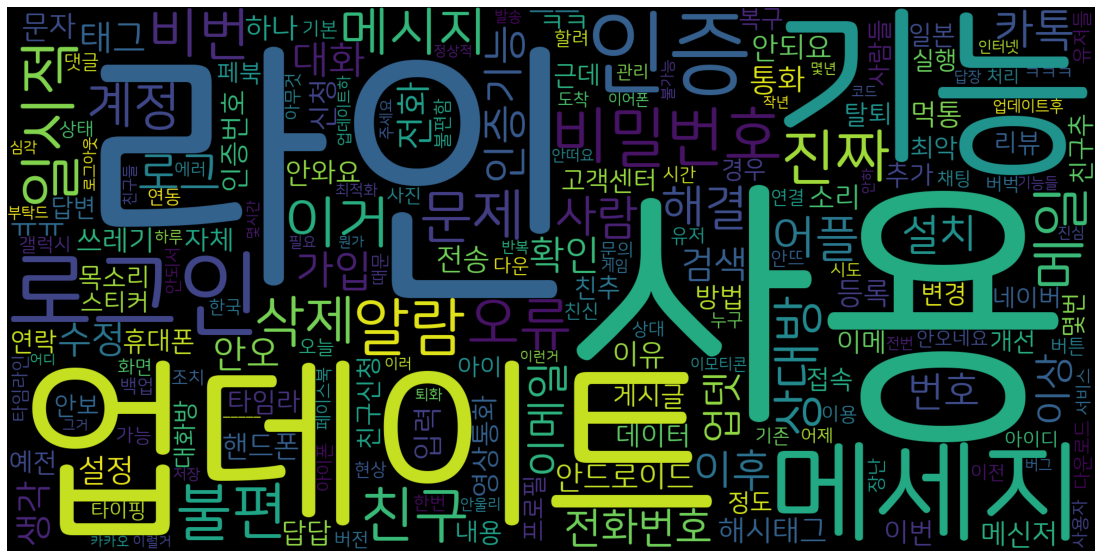

In [7]:
wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()